In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [5]:
smooth = 100
gc = 3.04438
E = 0.5
#
schedule = np.loadtxt('09-1265A-E_Advantage_system5_4_annealing_schedule.csv', delimiter=",")
#
# ug = scipy.interpolate.UnivariateSpline(schedule[:, 0], schedule[:, 1] * np.pi, s=0, k=4)
#
ug = scipy.interpolate.UnivariateSpline(schedule[:, 0], schedule[:, 1] * np.pi * (1 - np.exp(-smooth * schedule[:, 0]**2)) + np.exp(-smooth * schedule[:, 0]**2) * 30, s=0, k=4)
uJ = scipy.interpolate.UnivariateSpline(schedule[:, 0], schedule[:, 2] * E * np.pi * (1 - np.exp(-smooth * schedule[:, 0]**2)), s=0, k=4)
#
dug = ug.derivative()
duJ = uJ.derivative()
#
ff = lambda s: ug(s) - gc * uJ(s)
sc = scipy.optimize.fsolve(ff, 0.5)
print(f"{sc=}")

ta = 1.0
tQ = ta * ug(sc) / (duJ(sc) / uJ(sc) - dug(sc) / ug(sc))
print(f"{tQ=}")


sc=array([0.34448735])
tQ=array([0.24450759])


np.float64(0.34604891347609346)

In [4]:
uug = scipy.interpolate.UnivariateSpline(schedule[:, 0], schedule[:, 1] * np.pi, s=0, k=4)
uuJ = scipy.interpolate.UnivariateSpline(schedule[:, 0], E * schedule[:, 2] * np.pi, s=0, k=4)


Text(0, 0.5, 'J(s)')

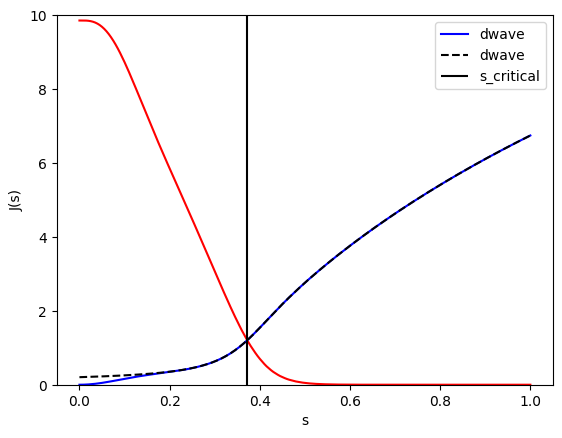

In [12]:
xx = np.linspace(0, 1, 201)
#
plt.plot(xx, ug(xx) / gc, '-r')
plt.plot(xx, uJ(xx), '-b', label='dwave')
plt.plot(xx, uuJ(xx), '--k', label='dwave')
plt.vlines(sc, 0, 10, color='k', label='s_critical')
#
plt.ylim([0, 10])
plt.legend()
plt.xlabel('s')
plt.ylabel('J(s)')

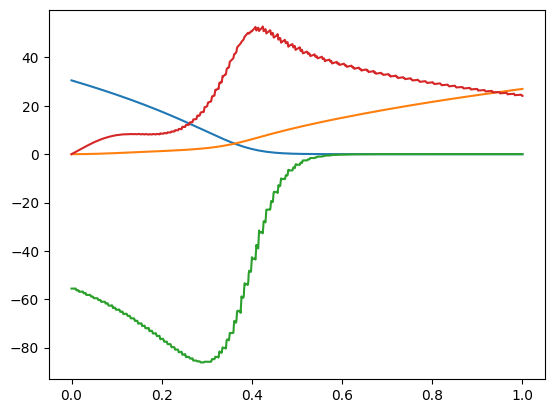

In [20]:
ss = np.linspace(0, 1, 1001)
ugs = np.array([ug(s) for s in ss])
uJs = np.array([uJ(s) for s in ss])
dugs = np.array([dug(s) for s in ss])
duJs = np.array([duJ(s) for s in ss])

plt.plot(ss, ugs)
plt.plot(ss, uJs)
plt.plot(ss, dugs)
plt.plot(ss, duJs)

# plt.plot(ss, ugs / (gc * uJs))
# plt.ylim([0, 0.01])
# plt.plot(schedule[:, 0], schedule[:, 1] * np.pi, '+')
# plt.plot(schedule[:, 0], gc * schedule[:, 2] * np.pi * (1 - np.exp(-40 * schedule[:, 0])), 'x')

In [17]:
ff = lambda s: fg(s) - gc * E * fJ(s)
sc = scipy.optimize.fsolve(ff, 0.5)
print(sc)

[0.31115509]


In [ ]:
def sc(E,gc=1.):
    return sa[np.argmin(abs(Ga-gc*E*Ja))]
def Jc(E,gc=1.):
    return E * Ja[np.argmin(abs(Ga-gc*E*Ja))]
def Gc(E,gc=1.):
    return Ga[np.argmin(abs(Ga-gc*E*Ja))]
def Jcp(E,gc=1.):
    return np.gradient(E*Ja,sa)[np.argmin(abs(Ga-gc*E*Ja))]
def Gcp(E,gc=1.):
    return np.gradient(Ga,sa)[np.argmin(abs(Ga-gc*E*Ja))]
def tQ(ta,E,gc=1.):
    # ta must be in ns
    return ta / gc * Jc(E,gc) / (Jcp(E,gc)/Jc(E,gc) - Gcp(E,gc)/Gc(E,gc))
def tQ_to_ta(tq,E,gc=1.):
    # ta must be in ns
    return tq * gc / Jc(E,gc) * (Jcp(E,gc)/Jc(E,gc) - Gcp(E,gc)/Gc(E,gc))
def hcoJc(h,E,gc=1.):
    return E * h / Jc(E,gc)
def hcoJc_to_hz(hcoJc,E,gc=1.):
    return hcoJc / E * Jc(E,gc)
def en_to_lambda(E,gc=1.):
    return ((Jcp(E,gc)/Jc(E,gc) - Gcp(E,gc)/Gc(E,gc)) / Jc(E,gc)) / ((Jcp(1.,gc)/Jc(1.,gc) - Gcp(1.,gc)/Gc(1.,gc)) / Jc(1.,gc))


In [18]:
fname = "/Users/marek/Programs/dwave_bias/bias_cluster_dwave/hz=0.5000/ta=0.1000/E=1.0000/ctm_sf=0.6000_D=4_which='NN+'_dt=0.01.npy"

In [24]:
x = np.load(fname, allow_pickle=True).item()

In [25]:
from yastn.tn import fpeps
import yastn

In [26]:
cfg = yastn.make_config()

In [29]:
fpeps.load_from_dict(cfg, x['env'])

Peps(geometry=<yastn.tn.fpeps._geometry.CheckerboardLattice object at 0x17a41cb90>, tensors={0: EnvCTM_local(tl=<yastn.tensor.Tensor object at 0x17a5dcbc0>, t=<yastn.tensor.Tensor object at 0x17a5dd910>, tr=<yastn.tensor.Tensor object at 0x17a5dddf0>, r=<yastn.tensor.Tensor object at 0x17a672210>, br=<yastn.tensor.Tensor object at 0x17a5dd700>, b=<yastn.tensor.Tensor object at 0x17a5dcec0>, bl=<yastn.tensor.Tensor object at 0x17a5dc8c0>, l=<yastn.tensor.Tensor object at 0x17a5dc590>), 1: EnvCTM_local(tl=<yastn.tensor.Tensor object at 0x17a6719d0>, t=<yastn.tensor.Tensor object at 0x17a5de450>, tr=<yastn.tensor.Tensor object at 0x17a673230>, r=<yastn.tensor.Tensor object at 0x17a668b60>, br=<yastn.tensor.Tensor object at 0x17a673500>, b=<yastn.tensor.Tensor object at 0x17a669250>, bl=<yastn.tensor.Tensor object at 0x17a670c20>, l=<yastn.tensor.Tensor object at 0x17a669e50>)})